
## LGBM & XGBM
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

In [2]:
#importing th required libraries for manipulation of the data
import pandas as pd
import numpy as np

## Exploratory Data Analysis (EDA):

In [4]:
#loading the datasets
dftrain=pd.read_csv("Titanic_train.csv")
dftest=pd.read_csv("Titanic_test.csv")

In [5]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#checking the information of the data
dftrain.info(),dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [8]:
#checking for the null values
dftrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#checking null values for test dataset
dftest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#description of the dataset
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
dftest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Skewness of data 0.38910778230082704


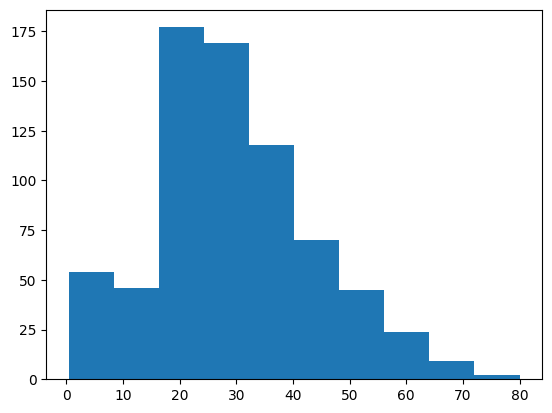

Skewness of data 4.787316519674893


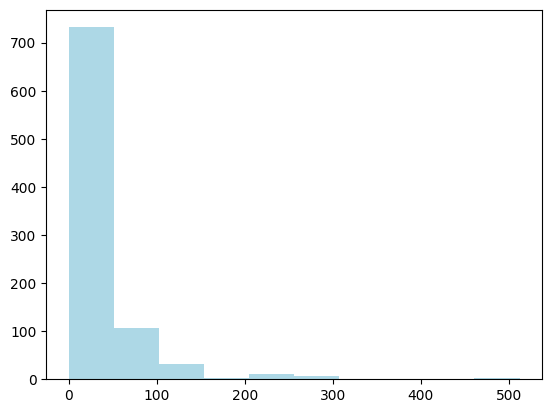

In [12]:
#creating the histogranms for checking the distribution of data
import matplotlib.pyplot as plt 
plt.hist(dftrain['Age'])
print("Skewness of data",dftrain["Age"].skew())
plt.show()

plt.hist(dftrain["Fare"],color='lightblue')
print("Skewness of data",dftrain['Fare'].skew())
plt.show()

In [13]:
#concating the train and test data for the purpose of visualization

df=pd.concat([dftrain,dftest],axis=0)  #merging with rows
df.reset_index(drop=True,inplace=True)   #reseting the index

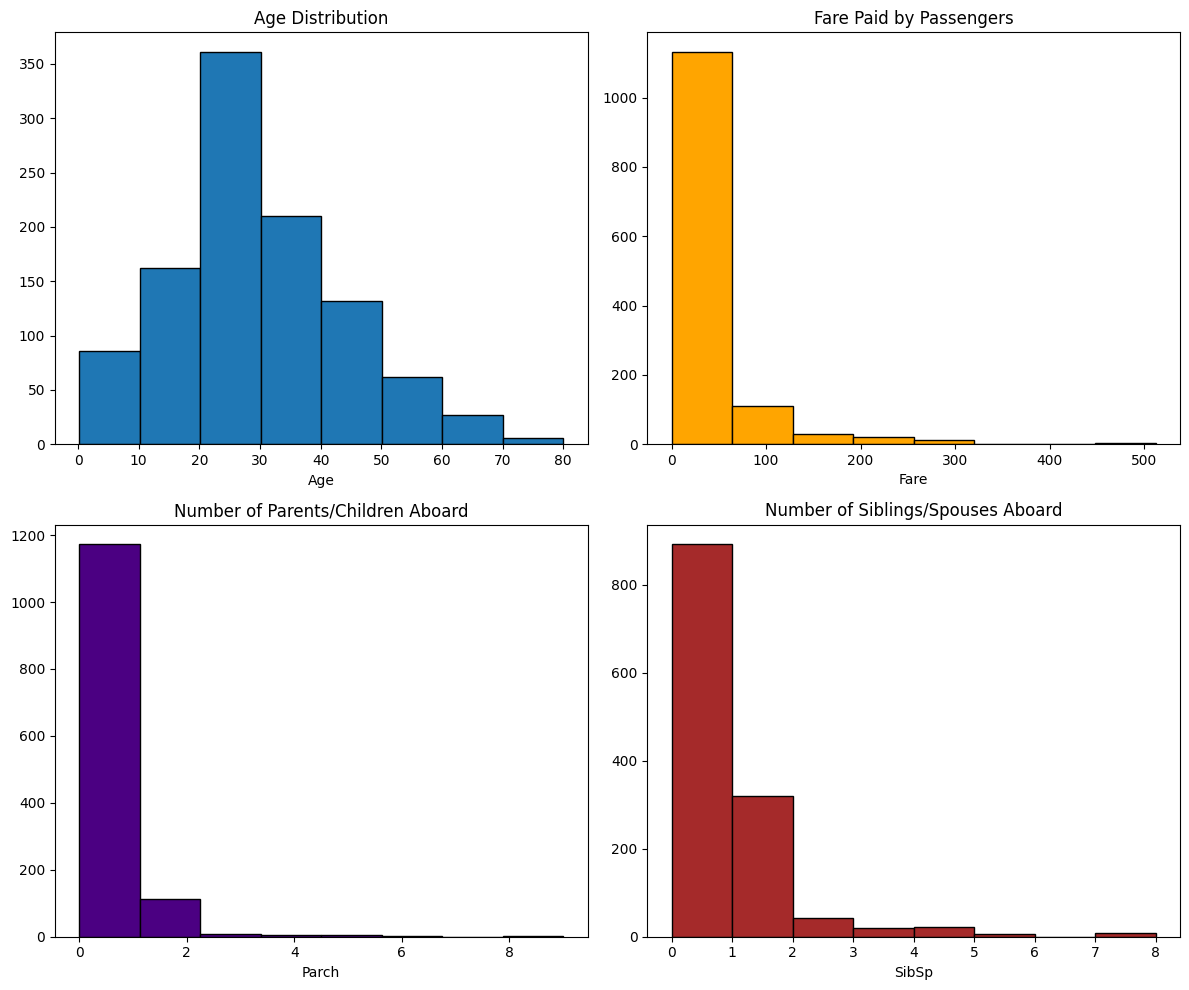


Skewness of Age: 0.40767455974362266
Skewness of Fare: 4.367709134122922
Skewness of Parch: 3.6690782036511136
Skewness of SibSp: 3.844220342922907


In [14]:
import warnings
warnings.filterwarnings('ignore')   #ignoring alll the warnings


# Creating the dashboard layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid layout

# Histogram for Age
axes[0, 0].hist(df['Age'], bins=8, edgecolor='black')
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age")

# Histogram for Fare
axes[0, 1].hist(df['Fare'], bins=8, color='orange', edgecolor='black')
axes[0, 1].set_title("Fare Paid by Passengers")
axes[0, 1].set_xlabel("Fare")

# Histogram for Parch
axes[1, 0].hist(df['Parch'], bins=8, color='indigo', edgecolor='black')
axes[1, 0].set_title("Number of Parents/Children Aboard")
axes[1, 0].set_xlabel("Parch")

# Histogram for SibSp
axes[1, 1].hist(df['SibSp'], bins=8, color='brown', edgecolor='black')
axes[1, 1].set_title("Number of Siblings/Spouses Aboard")
axes[1, 1].set_xlabel("SibSp")
# Adjust layout
plt.tight_layout()
plt.show()

# Print skewness values
print("\nSkewness of Age:", df["Age"].skew())
print("Skewness of Fare:", df["Fare"].skew())
print("Skewness of Parch:", df["Parch"].skew())
print("Skewness of SibSp:", df["SibSp"].skew())

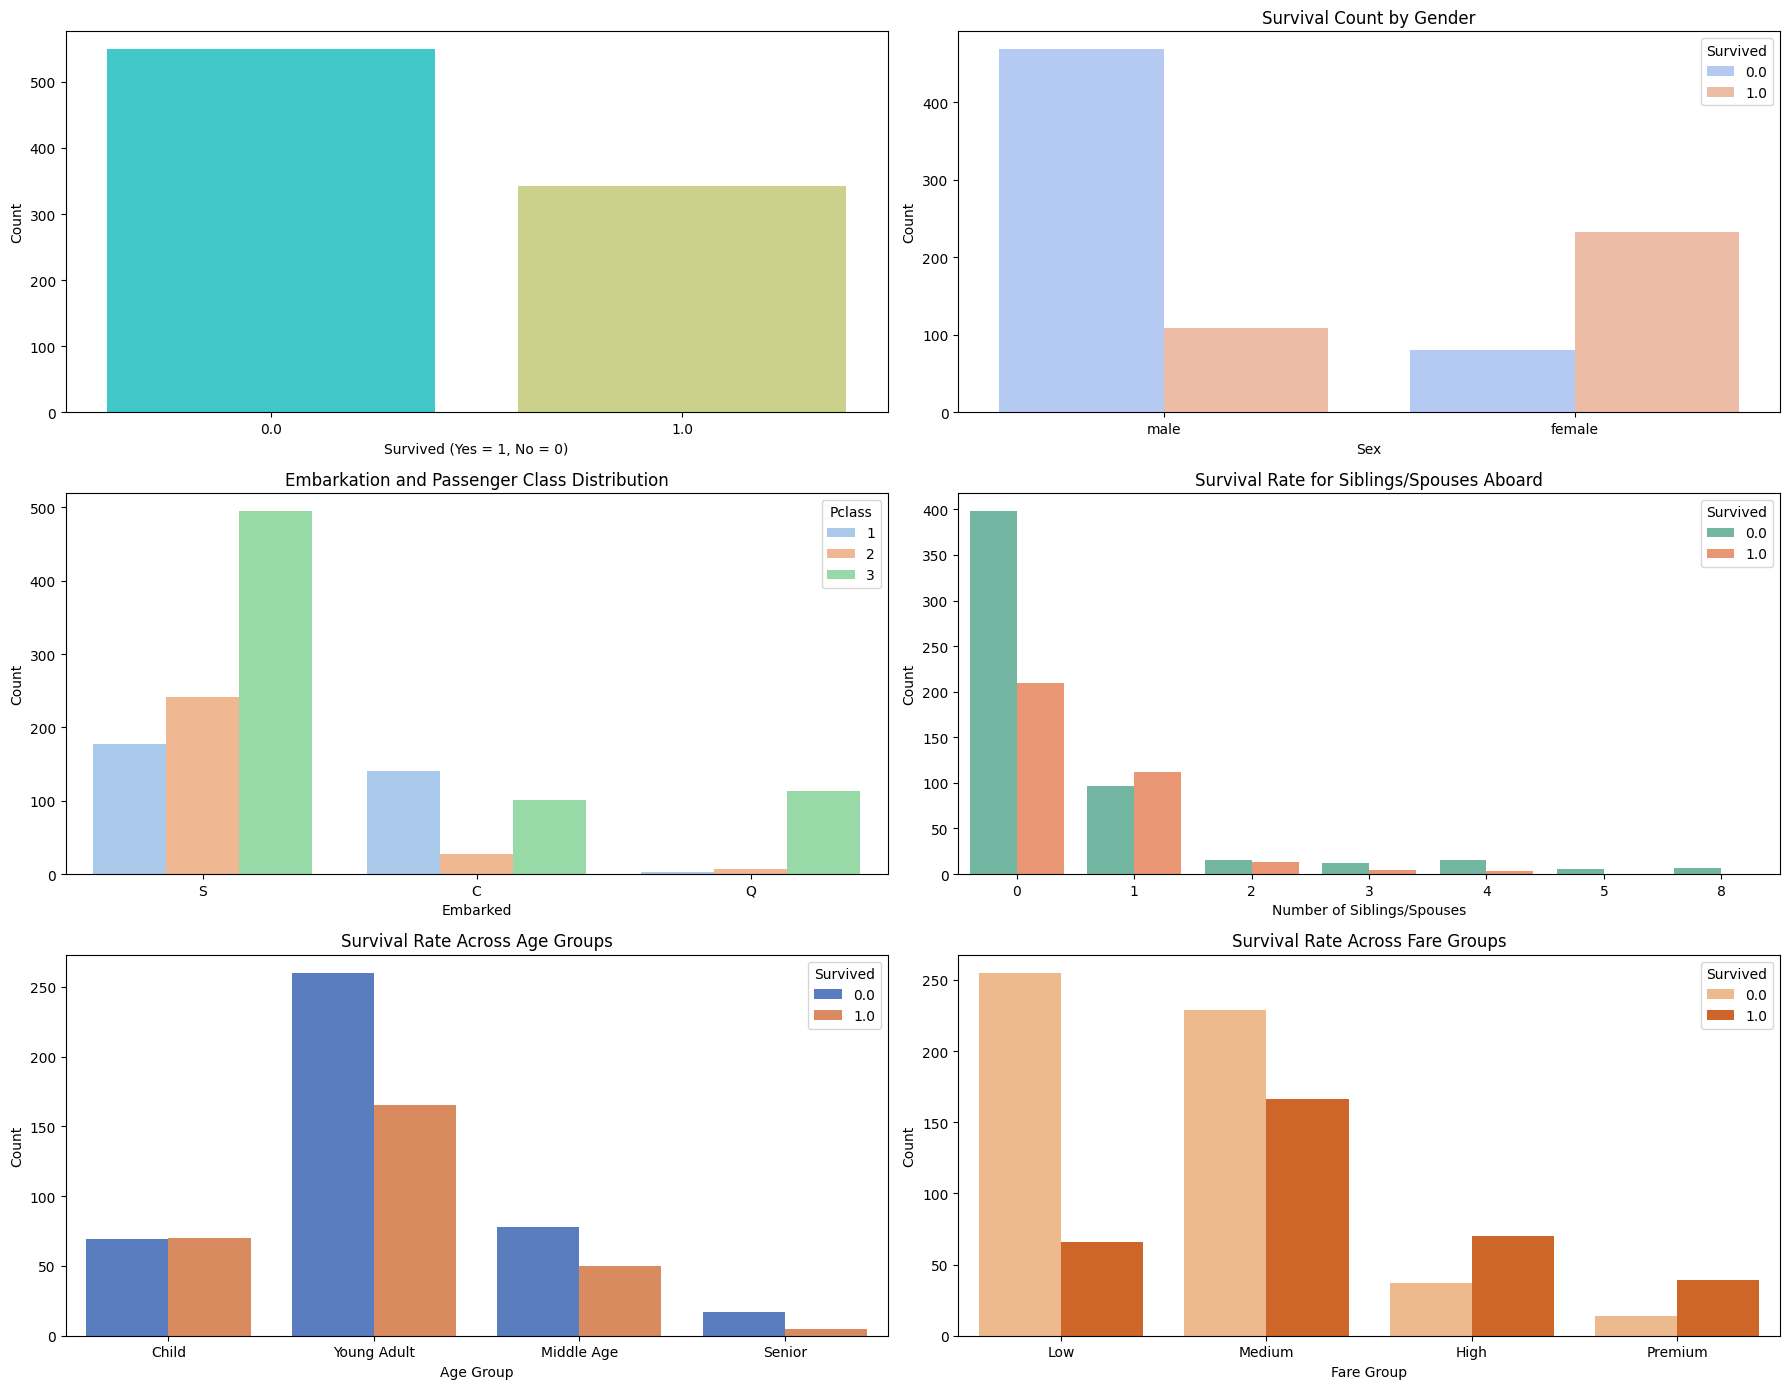


Skewness of SibSp: 3.844220342922907
Skewness of Pclass: -0.5986471102804279
Skewness of Fare: 4.367709134122922


In [15]:
import seaborn as sns
# Creating a dashboard layout (3x2)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))

#Survival Count
sns.barplot(x=df['Survived'].value_counts().index, y=df['Survived'].value_counts().values, ax=axes[0, 0], palette='rainbow')
axes[0, 0].set_xlabel("Survived (Yes = 1, No = 0)")
axes[0, 0].set_ylabel("Count")

# Gender-based Survival
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0, 1], palette='coolwarm')  #palette means color combinations
axes[0, 1].set_title("Survival Count by Gender")
axes[0, 1].set_xlabel("Sex")
axes[0, 1].set_ylabel("Count")

# Embarkation Distribution
sns.countplot(x='Embarked', hue='Pclass', data=df, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title("Embarkation and Passenger Class Distribution")
axes[1, 0].set_xlabel("Embarked")
axes[1, 0].set_ylabel("Count")

# Sibling/Spouse Survival Analysis
sns.countplot(x='SibSp', hue='Survived', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title("Survival Rate for Siblings/Spouses Aboard")
axes[1, 1].set_xlabel("Number of Siblings/Spouses")
axes[1, 1].set_ylabel("Count")

#this plot split countinuous numeric data into descrete bins
# Age Group Comparison for Survival (Binned into Categories)
                                          #ages in intervals      #creates a new column
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 40, 60, 80], labels=['Child', 'Young Adult', 'Middle Age', 'Senior'])
sns.countplot(x='Age_Group', hue='Survived', data=df, ax=axes[2, 0], palette='muted')
axes[2, 0].set_title("Survival Rate Across Age Groups")
axes[2, 0].set_xlabel("Age Group")
axes[2, 0].set_ylabel("Count")

# Fare Category Analysis (Binned for Better Comparison)
                                            #fare categories
df['Fare_Group'] = pd.cut(df['Fare'], bins=[0, 10, 50, 100, 600], labels=['Low', 'Medium', 'High', 'Premium'])
sns.countplot(x='Fare_Group', hue='Survived', data=df, ax=axes[2, 1], palette='Oranges')
axes[2, 1].set_title("Survival Rate Across Fare Groups")
axes[2, 1].set_xlabel("Fare Group")
axes[2, 1].set_ylabel("Count")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Print Skewness values
print("\nSkewness of SibSp:", df["SibSp"].skew())  # Right skewed
print("Skewness of Pclass:", df["Pclass"].skew())  # Right skewed
print("Skewness of Fare:", df["Fare"].skew())  # Right skewed

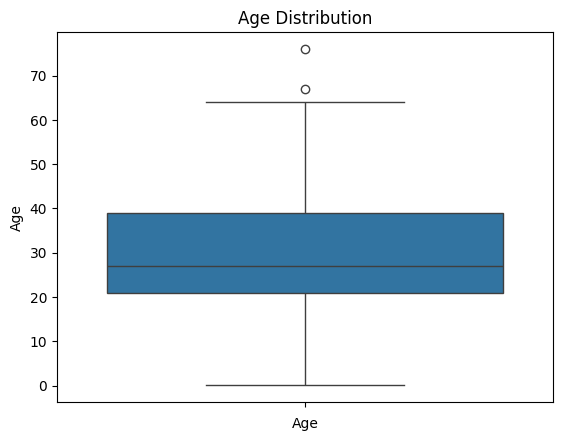

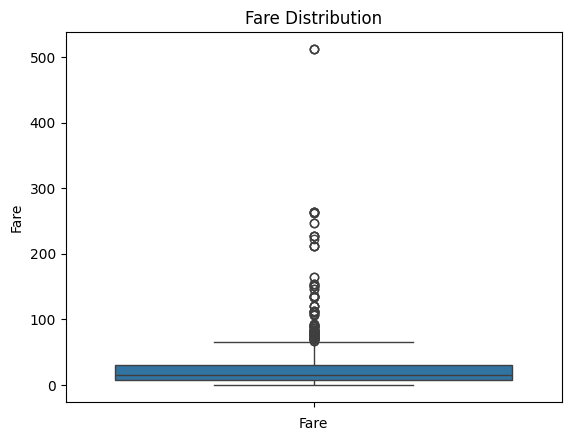

In [16]:
# Boxplot for Age
sns.boxplot(dftest['Age'])
plt.xlabel('Age')
plt.title("Age Distribution")
plt.show()
#in the age column the outlaers in lower bound is less than 3 maybe the baby
#or kids and on uppper limits they may be old people

sns.boxplot(dftrain['Fare'])
plt.xlabel("Fare")
plt.title("Fare Distribution")
plt.show()

#from the box plot of fare column we can assume that some of them has payed
#more maybe because of late ticket booking or some tickets for luxey cabins

## Data Preprocessing:

In [18]:

#checking for the null  values

dftrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#data imputation

dftrain['Age'].fillna(dftrain['Age'].mean(),inplace=True)
dftest['Age'].fillna(dftest['Age'].mean(),inplace=True)

In [20]:
dftrain.isnull().sum()
dftest.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
#data imputation

dftrain['Cabin'] = dftrain.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))
                                        #applies function to each group
                                        #x.mode()[0]  finds the most frequent cabin value
                                        #fillna(x.mode()[0])replace missing cabin values

dftest['Cabin'] = dftest.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))

In [22]:
#checking for the null

dftrain.isnull().sum()
dftest.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [23]:
#droping the rows of fare that is 1
dftrain = dftrain.dropna(subset=['Fare'])  # Removes rows where 'Fare' is NaN
dftest=dftest.dropna(subset=['Fare'])

In [24]:
#cross checking for the null values

dftrain.isnull().sum()
dftest.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [25]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S


In [26]:
#columns  need to label encoded/one hot encoded are

from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
dftrain['Sex']=label.fit_transform(dftrain['Sex'])
dftest['Sex']=label.fit_transform(dftest['Sex'])


dftrain['Embarked']=label.fit_transform(dftrain['Embarked'])
dftest['Embarked']=label.fit_transform(dftest['Embarked'])
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,G6,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G6,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,G6,2


In [27]:
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,F E46,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,F E46,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,F4,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,F E46,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,F E46,2


In [28]:
#transforming the number values in standard form

from sklearn.preprocessing import StandardScaler

x=dftrain[['Age','Fare']]
x1=dftest[['Age','Fare']]
scale=StandardScaler()

dftrain[['Age','Fare']]=scale.fit_transform(x)
dftest[['Age','Fare']]=scale.fit_transform(x1)
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,0.342695,0,0,330911,-0.497811,F E46,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1.338924,1,0,363272,-0.512660,F E46,2
2,894,2,"Myles, Mr. Thomas Francis",1,2.534399,0,0,240276,-0.464532,F4,1
3,895,3,"Wirz, Mr. Albert",1,-0.255043,0,0,315154,-0.482888,F E46,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,-0.653535,1,1,3101298,-0.417971,F E46,2


## Building Predictive Models:
1.Split the preprocessed dataset into training and testing sets.
2.Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.Build predictive models using LightGBM and XGBoost algorithms.
4.Train the models on the training set and evaluate their performance on the testing set.
5.Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [30]:
#data partation

from sklearn.model_selection import train_test_split

x=dftrain[['Age','Fare','Sex','SibSp','Parch','Embarked']]
y=dftrain['Survived']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=37)

In [31]:
!pip install xgboost

## applying XGBoost

In [33]:
#fitting the XBboost

import xgboost as xgb

xgbmodel=xgb.XGBClassifier(n_estimators=100,
                           Learning_rate=0.1,     #controls the step size
                           gamma=10,              #minimum loss reduction required to make split
                           re_lambda=5)           #regularization lambda controls overfitting


xgbmodel.fit(xtrain,ytrain)    #model fitting

y_pred_train_xgb=xgbmodel.predict(xtrain)     #model prediction
y_pred_test_xgb=xgbmodel.predict(xtest)

## Metrics Calculatios

In [35]:
#metrics calculation

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

accuracy=accuracy_score(ytrain,y_pred_train_xgb)
accuracytest=accuracy_score(ytest,y_pred_test_xgb)

print("accuracy score of training data with xgboost",accuracy)
print("accuracy score of testing data with xgboost",accuracytest)
print()

precision=precision_score(ytrain,y_pred_train_xgb)
precisiontest=precision_score(ytest,y_pred_test_xgb)

print("precision score of training data with xgboost",precision)
print("precision score of testing data with xgboost",precisiontest)
print()

recall=recall_score(ytrain,y_pred_train_xgb)
recalltest=recall_score(ytest,y_pred_test_xgb)

print("recall score of training data with xgboost",recall)
print("recall score of testing data with xgboost",recalltest)
print()

f1=f1_score(ytrain,y_pred_train_xgb)
f1test=f1_score(ytest,y_pred_test_xgb)
print("f1 score of training data with xgboost",f1)
print("f1 score of testing data with xgboost",f1test)
print()

accuracy score of training data with xgboost 0.8174157303370787
accuracy score of testing data with xgboost 0.8156424581005587

precision score of training data with xgboost 0.7701612903225806
precision score of testing data with xgboost 0.8169014084507042

recall score of training data with xgboost 0.7234848484848485
recall score of testing data with xgboost 0.7435897435897436

f1 score of training data with xgboost 0.74609375
f1 score of testing data with xgboost 0.7785234899328859



In [36]:
#calculating the metrics using the classification report

print(classification_report(ytrain,y_pred_train_xgb))
print()
print(classification_report(ytest,y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       448
           1       0.77      0.72      0.75       264

    accuracy                           0.82       712
   macro avg       0.81      0.80      0.80       712
weighted avg       0.82      0.82      0.82       712


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       101
           1       0.82      0.74      0.78        78

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



In [37]:
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,0.342695,0,0,330911,-0.497811,F E46,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1.338924,1,0,363272,-0.512660,F E46,2
2,894,2,"Myles, Mr. Thomas Francis",1,2.534399,0,0,240276,-0.464532,F4,1
3,895,3,"Wirz, Mr. Albert",1,-0.255043,0,0,315154,-0.482888,F E46,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,-0.653535,1,1,3101298,-0.417971,F E46,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,0.005777,0,0,A.5. 3236,-0.493856,F E46,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,0.701337,0,0,PC 17758,1.312180,C105,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,0.661488,0,0,SOTON/O.Q. 3101262,-0.508183,F E46,2
416,1308,3,"Ware, Mr. Frederick",1,0.005777,0,0,359309,-0.493856,F E46,2


## Apply on test titanic data

In [39]:
#Apply the xgboost on seperate test dataset

dftest=x=dftest[['Age','Fare','Sex','SibSp','Parch','Embarked']]

xtest_pred=xgbmodel.predict(dftest)

dftest['Survived']=pd.DataFrame(xtest_pred)

In [40]:
dftest

,Age,Fare,Sex,SibSp,Parch,Embarked,Survived
0,0.342695,-0.497811,1,0,0,1,0.0
1,1.338924,-0.512660,0,1,0,2,1.0
2,2.534399,-0.464532,1,0,0,1,0.0
3,-0.255043,-0.482888,1,0,0,2,0.0
4,-0.653535,-0.417971,0,1,1,2,1.0
...,...,...,...,...,...,...,...
413,0.005777,-0.493856,1,0,0,2,1.0
414,0.701337,1.312180,0,0,0,0,0.0
415,0.661488,-0.508183,1,0,0,2,0.0
416,0.005777,-0.493856,1,0,0,2,0.0


In [41]:
dftest['Survived'].value_counts()

Survived
0.0    253
1.0    163
Name: count, dtype: int64

## Building the Model on LGBoost

In [43]:
!pip install lightgbm

In [44]:
#importing the lightgbm library

import lightgbm as lgb

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from lightgbm import early_stopping

In [45]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((712, 6), (712,), (179, 6), (179,))

In [46]:
#creating  a lightgbm datasets

train_data=lgb.Dataset(xtrain,label=ytrain)
validation_data=lgb.Dataset(xtest,label=ytest,reference=train_data)

In [47]:
#setting the parameters for lightgbm

#setting the parameters for lightgbm
#setting the parameters for lightgbm

params={'objective':"binary",
        'metric':'binary_logloss',
        'learning_rate': 0.05,
        'num_leaves':31}

In [48]:
# training the model

from lightgbm.callback import early_stopping, log_evaluation # Import log_evaluation as well

modellgb=lgb.train(params,
                train_data,
                num_boost_round=200,
                valid_sets=[validation_data],
                callbacks=[lgb.early_stopping(10), # Use lgb.early_stopping, the number is the stopping round
                           lgb.log_evaluation(period=0)])  # Use lgb.log_evaluation
                                              #set period=10 to print every 10 rounds

[LightGBM] [Info] Number of positive: 264, number of negative: 448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [49]:
 
#predict

y_pred_train=modellgb.predict(xtrain)
y_pred_test=modellgb.predict(xtest)

In [50]:
accuracytrain=accuracy_score(ytrain,y_pred_train.round())
accuracytest=accuracy_score(ytest,y_pred_test.round())

print("accuracy score of training data with lightgbm",accuracytrain)
print("accuracy score of testing data with lightgbm",accuracytest)
print()

precisiontrain=precision_score(ytrain,y_pred_train.round())
precisiontest=precision_score(ytest,y_pred_test.round())

print("precision score of training data with lightgbm",precisiontrain)
print("Precision score of testing data with lightgbm",precisiontest)
print()

recalltrain=recall_score(ytrain,y_pred_train.round())
recalltest=recall_score(ytest,y_pred_test.round())

print("recall score of training data with lightgbm",recalltrain)
print("recall score of testing data with lightgbm",recalltest)
print()

f1scoretrain=f1_score(ytrain,y_pred_train.round())
f1scoretest=f1_score(ytest,y_pred_test.round())

print("f1 score of training data with lightgbm",f1scoretrain)
print("f1 score of testing data with lightgbm",f1scoretest)
print()

accuracy score of training data with lightgbm 0.8735955056179775
accuracy score of testing data with lightgbm 0.8156424581005587

precision score of training data with lightgbm 0.8883928571428571
Precision score of testing data with lightgbm 0.8260869565217391

recall score of training data with lightgbm 0.7537878787878788
recall score of testing data with lightgbm 0.7307692307692307

f1 score of training data with lightgbm 0.8155737704918032
f1 score of testing data with lightgbm 0.7755102040816326



In [51]:
#predicting on titatinic test data

dftest=dftest.iloc[:,0:6]
titanic_test=modellgb.predict(dftest)
dftest['titatinic_test LGB']=pd.DataFrame(titanic_test)

In [52]:
dftest

,Age,Fare,Sex,SibSp,Parch,Embarked,titatinic_test LGB
0,0.342695,-0.497811,1,0,0,1,0.031676
1,1.338924,-0.512660,0,1,0,2,0.253062
2,2.534399,-0.464532,1,0,0,1,0.107014
3,-0.255043,-0.482888,1,0,0,2,0.073259
4,-0.653535,-0.417971,0,1,1,2,0.545142
...,...,...,...,...,...,...,...
413,0.005777,-0.493856,1,0,0,2,0.974991
414,0.701337,1.312180,0,0,0,0,0.019125
415,0.661488,-0.508183,1,0,0,2,0.048195
416,0.005777,-0.493856,1,0,0,2,0.199011


In [53]:
#creating the lgb predicted survival column

dftest['LGB_predict Survival'] = np.where(dftest['titatinic_test LGB'] > 0.5, 1, 0)
dftest['LGB_predict Survival'].value_counts()

LGB_predict Survival
0    273
1    144
Name: count, dtype: int64

## 5. Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [55]:
#applying the cross validation technique on the train data

from sklearn.model_selection import cross_val_score

lgb_model=lgb.LGBMClassifier(objective='binary',
                             metric='binary_logloss',
                             num_leaves=31,
                             n_estimators=200)
lgb_model.fit(xtrain,ytrain)

score=cross_val_score(lgb_model,xtrain,ytrain,cv=10,scoring='accuracy')

[LightGBM] [Info] Number of positive: 264, number of negative: 448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [56]:
#printing the score

print("cross validation score",score)
print()
print("cross validation mean score",score.mean())

cross validation score [0.79166667 0.75       0.76056338 0.77464789 0.81690141 0.74647887
 0.83098592 0.77464789 0.83098592 0.84507042]

cross validation mean score 0.7921948356807511


## Hyperparameter Tuning

In [58]:
#checking whether the hyperparameter tuning will help in improving the accuracy score or not

from sklearn.model_selection import GridSearchCV

param_grids={'learning_rate':[0.1,0.01,1,1.5,2],
             'gamma':[10,5,15,20],
             're_lambda':[1,3,5,7,9,10],
             'n_estimator':[50,100,150,200]}

xgbmodel=xgb.XGBClassifier()
grid=GridSearchCV(xgbmodel,param_grids,cv=10,scoring='accuracy')
grid.fit(xtrain,ytrain)

grid.best_params_

{'gamma': 5, 'learning_rate': 1.5, 'n_estimator': 50, 're_lambda': 1}

In [59]:
print("Best score found from hyperparameter tuning=",grid.best_score_)

Best score found from hyperparameter tuning= 0.809037558685446


In [60]:
#hyperparameter tuning for lightlgm

import lightgbm as lgb # Make sure lightgbm is imported
from lightgbm import LGBMClassifier # Import the LGBMClassifier


param_grids={'objective':['binary'],
             'metric':['binary_logloss'],
             'num_leaves':[10,20,0,31,41,51],
             'n_estimators':[50,100,150,200,300],
             'learning_rate':[0.1,0.01,0.001,1,1.5,2,2.5],
             'gamma':[10,5,15,20,25,30,]}

lgb_model=LGBMClassifier()

gridlgb=GridSearchCV(lgb_model,param_grids,cv=10,scoring='accuracy',n_jobs=-1)

gridlgb.fit(xtrain,ytrain)


print(gridlgb.best_params_)
print(gridlgb.best_score_)

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Number of positive: 264, number of negative: 448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
{'gamma': 10, 'learning_rate': 0.01, 'metric': 'binary_logloss', 'n_estimators': 300, 'num_leaves': 10, 'objective': 'binary'}
0.8160602503912363


In [61]:
# from the above Hyperparameter results  for XGBoost{'gamma': 5, 'learning_rate': 1.5, 'n_estimator': 50, 're_lambda': 1} is giving the best accuracy_score=0.809037558685446

#hyper parameter for LGBoost with parameters{'gamma': 10, 'learning_rate': 0.01, 'metric': 'binary_logloss', 'n_estimators': 300, 'num_leaves': 10, 'objective': 'binary'}
# Acuuracy score 0.8160602503912363

## 2. Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

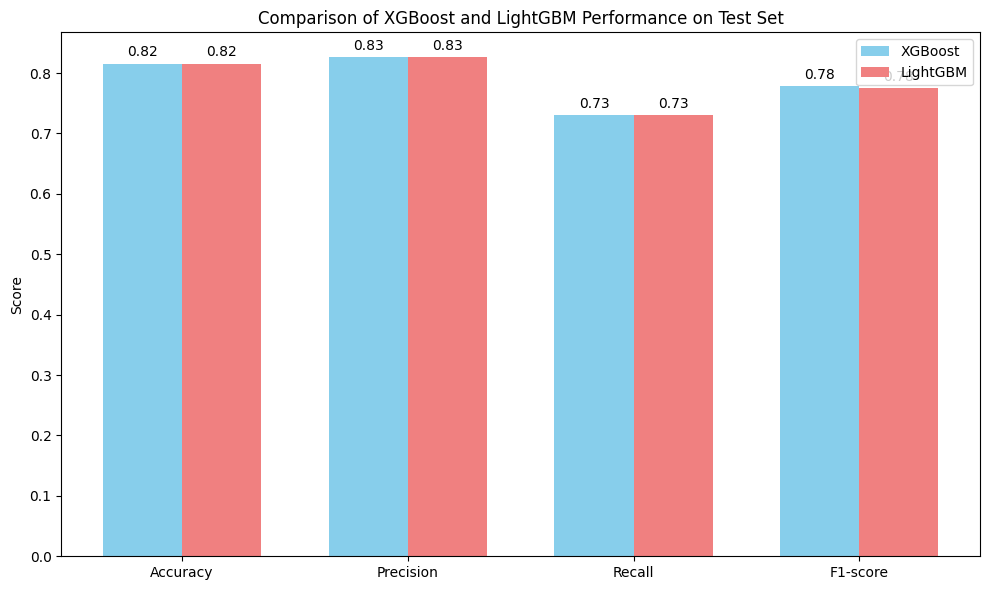

In [63]:
# Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

# Re-calculate metrics for clarity and shorter variable names
xgb_metrics = {
    'Accuracy': accuracytest,
    'Precision': precisiontest,
    'Recall': recalltest,
    'F1-score': f1test
}

lgb_metrics = {
    'Accuracy': accuracytest, # Assuming this was meant to be a different variable for LGBM test accuracy
    'Precision': precisiontest,
    'Recall': recalltest,
    'F1-score': f1scoretest # Using the correct variable name
}


# Prepare data for plotting
metrics_names = list(xgb_metrics.keys())
xgb_values = list(xgb_metrics.values())
lgb_values = list(lgb_metrics.values())

x = np.arange(len(metrics_names))
width = 0.35
# Create bar plot
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, xgb_values, width, label='XGBoost', color='skyblue')
rects2 = ax.bar(x + width/2, lgb_values, width, label='LightGBM', color='lightcoral')

ax.set_ylabel('Score')
ax.set_title('Comparison of XGBoost and LightGBM Performance on Test Set')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

# Add labels to bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

In [64]:
print("\n--- Analysis of Strengths and Weaknesses ---")
print()
print("Based on the visualized metrics and cross-validation scores:")

if lgb_metrics['F1-score'] > xgb_metrics['F1-score']:
    print("- LightGBM shows a slightly better balance between precision and recall on the test set (higher F1-score).")
    print()
elif lgb_metrics['F1-score'] < xgb_metrics['F1-score']:
    print("==>XGBoost shows a slightly better balance between precision and recall on the test set (higher F1-score).")
    print()
else:
    print("==>Both models have similar F1-scores on the test set.")

if gridlgb.best_score_ > score.mean(): # Comparing tuned LGBM CV score to potentially untuned XGBoost CV score
     print("==>LightGBM with hyperparameter tuning achieved a higher mean cross-validation accuracy.")
     print()
elif gridlgb.best_score_ < score.mean():
     print("==>XGBoost achieved a higher mean cross-validation accuracy (potentially untuned).")
     print()
else:
     print("==>Both models achieved similar mean cross-validation accuracy.")
     print()

# Note on overfitting: A simple comparison of train vs test accuracy was in the original code.
# Without re-calculating train scores here, we rely on the general trend.


--- Analysis of Strengths and Weaknesses ---

Based on the visualized metrics and cross-validation scores:
==>XGBoost shows a slightly better balance between precision and recall on the test set (higher F1-score).

==>LightGBM with hyperparameter tuning achieved a higher mean cross-validation accuracy.



In [65]:
print("\nConsider training vs test scores for potential overfitting. A large gap indicates overfitting.")

print("\n---****************************  Conclusion   **************************************************---")
print()
print("Both models perform well. LightGBM shows a slight advantage based on the tuned cross-validation accuracy and potentially the test F1-score, suggesting it might be slightly better suited for this dataset after optimization.")


Consider training vs test scores for potential overfitting. A large gap indicates overfitting.

---****************************  Conclusion   **************************************************---

Both models perform well. LightGBM shows a slight advantage based on the tuned cross-validation accuracy and potentially the test F1-score, suggesting it might be slightly better suited for this dataset after optimization.
